In [20]:
import pandas as pd
import numpy as np
#import matplotlib
#matplotlib.use("TKAgg")
#import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
sns.set_style("darkgrid")

In [81]:
from sklearn.datasets import make_blobs #synthetic dataset
from sklearn.neighbors import KNeighborsClassifier #kNN classifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [66]:
import visuals_2 as vs

In [23]:
DATASET='Dataset/wine/winequality.csv'

In [24]:
df = pd.read_csv (DATASET)

In [25]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [27]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9])

In [28]:
df['quality'].unique().tolist()

[5, 6, 7, 4, 8, 3, 9]

In [29]:
df['quality']

0       5
1       5
2       5
3       6
4       5
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 6497, dtype: int64

<AxesSubplot:>

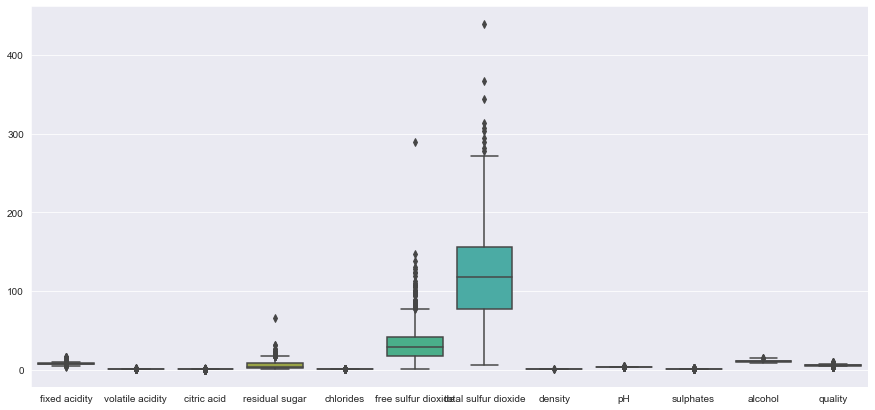

In [30]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=df)

/opt/anaconda3/envs/ai_env/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

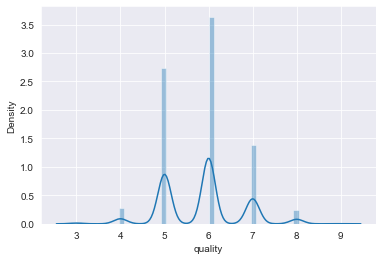

In [31]:
sns.distplot(df.quality)

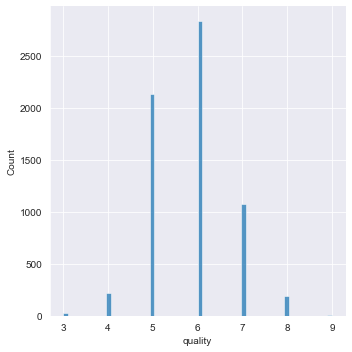

In [32]:
sns.displot(df.quality)

<AxesSubplot:xlabel='quality', ylabel='Count'>

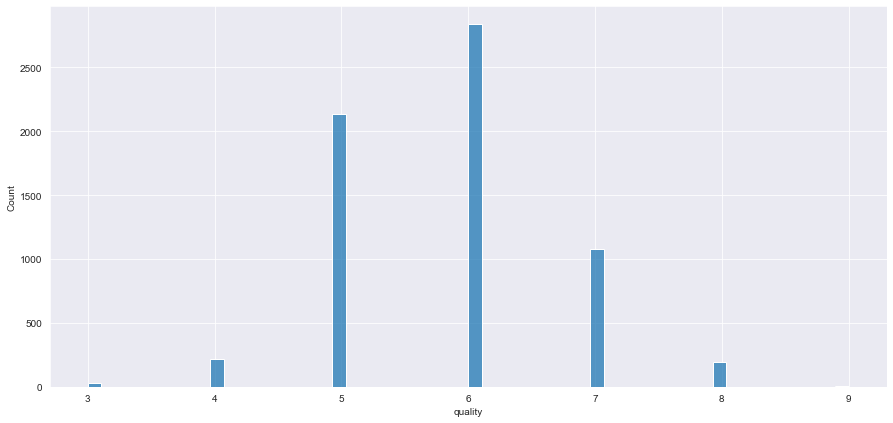

In [33]:
plt.figure(figsize=(15, 7))
sns.histplot(df.quality)

In [34]:
colors = ['#78C850',  # Grass
            '#F08030',  # Fire
            '#6890F0',  # Water
            '#A8B820',  # Bug
            '#A8A878',  # Normal
            '#A040A0',  # Poison
            '#F8D030',  # Electric
            '#E0C068',  # Ground
            '#EE99AC',  # Fairy
            '#C03028',  # Fighting
            '#F85888',  # Psychic
            '#B8A038',  # Rock
            '#705898',  # Ghost
            '#98D8D8',  # Ice
            '#7038F8',  # Dragon
        ]

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '3'),
  Text(1, 0, '4'),
  Text(2, 0, '5'),
  Text(3, 0, '6'),
  Text(4, 0, '7'),
  Text(5, 0, '8'),
  Text(6, 0, '9')])

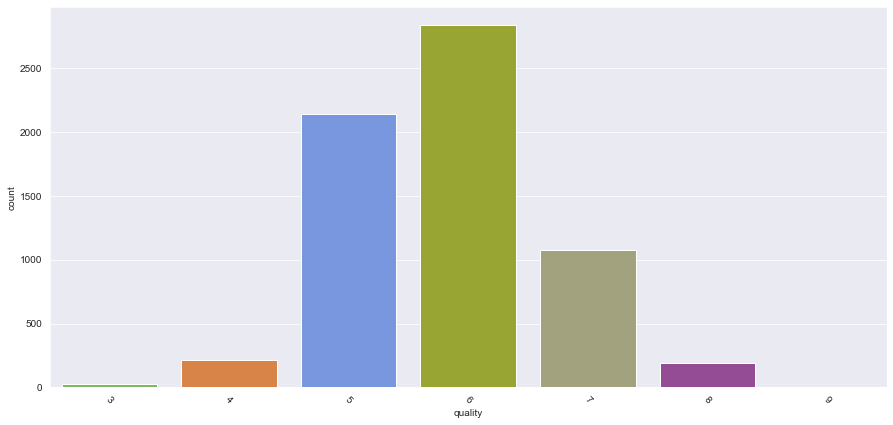

In [35]:
# Count Plot (a.k.a. Bar Plot)
plt.figure(figsize=(15, 7))
sns.countplot(x='quality', data=df, palette=colors) 
# Rotate x-labels
plt.xticks(rotation=-45)

In [36]:
df[['quality']] = df['quality'].apply(lambda x : (x - x) if int(x) < 6 else ((x - x) + 1))

In [37]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        1  
4         9.4        0  
...       ...      ...  
6492     11.2        1  
6493      9.6        0  
6494      9.4        1  
6495     12.8        1  
6496     11.8        1  

[6497 rows x 12 columns]

In [38]:
#split dataset in features and target variable
feature_cols = ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
X = df[feature_cols] # Features
y = df.quality # Target variable

In [39]:
X

fixed acidity  volatile acidity  residual sugar  chlorides  \
0               7.4              0.70             1.9      0.076   
1               7.8              0.88             2.6      0.098   
2               7.8              0.76             2.3      0.092   
3              11.2              0.28             1.9      0.075   
4               7.4              0.70             1.9      0.076   
...             ...               ...             ...        ...   
6492            6.2              0.21             1.6      0.039   
6493            6.6              0.32             8.0      0.047   
6494            6.5              0.24             1.2      0.041   
6495            5.5              0.29             1.1      0.022   
6496            6.0              0.21             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
6492     11.2  
6493      9.6  
6494      9.4  
6495     12.8  
6496     11.8  

[6497 rows x 10 columns]

In [14]:
y

0       0
1       0
2       0
3       1
4       0
       ..
6492    1
6493    0
6494    1
6495    1
6496    1
Name: quality, Length: 6497, dtype: int64

### 1) Decision Tree

In [15]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [16]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [17]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7476923076923077


In [19]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [20]:
print('min_samples_leaf\t:', clf.get_params()['min_samples_leaf'])
print('min_samples_split\t:', clf.get_params()['min_samples_split'])
print('max_depth\t\t:', clf.tree_.max_depth)
print('node_count\t\t:', clf.tree_.node_count)

min_samples_leaf	: 1
min_samples_split	: 2
max_depth		: 24
node_count		: 1417


In [15]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
import pydotplus

/opt/anaconda3/envs/ai_env/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.318507 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.318507 to fit



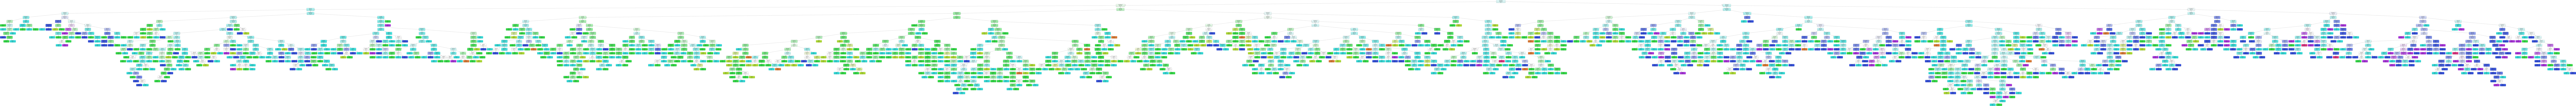

In [16]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['5', '6', '7', '4', '8', '3', '9'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('wineQuality.png')
Image(graph.create_png())

In [21]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7471794871794872


/opt/anaconda3/envs/ai_env/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


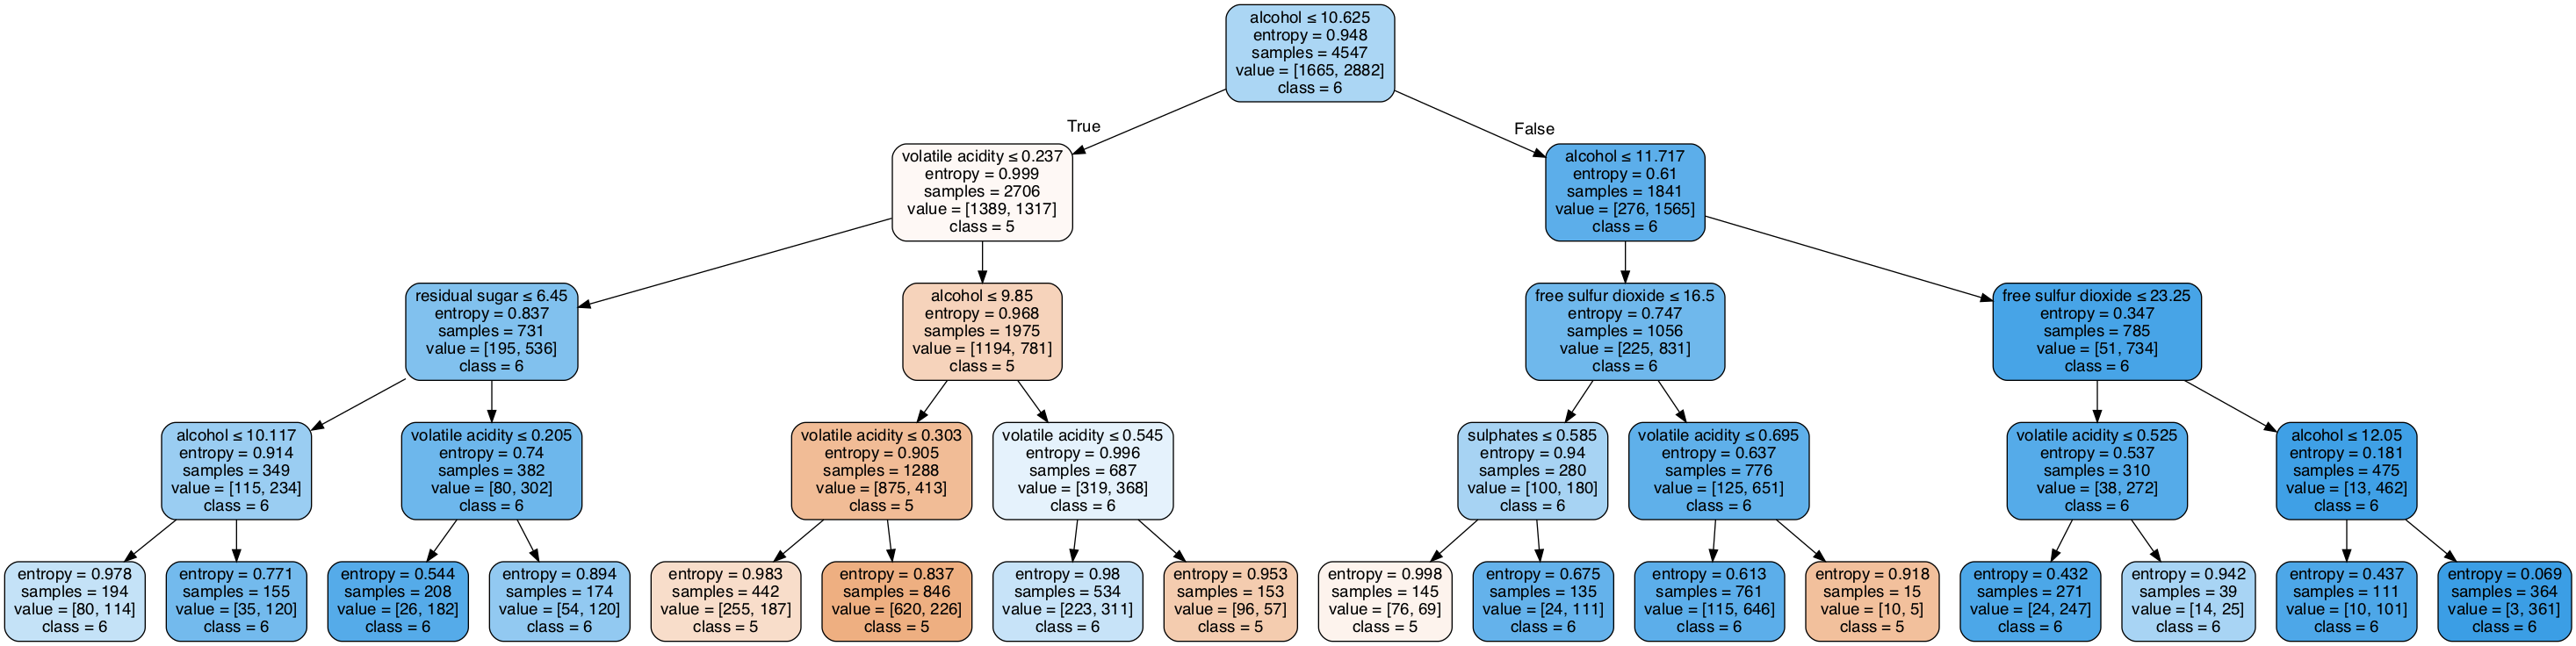

In [22]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['5', '6', '7', '4', '8', '3', '9'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('wineQuality.png')
Image(graph.create_png())

In [23]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7415384615384616


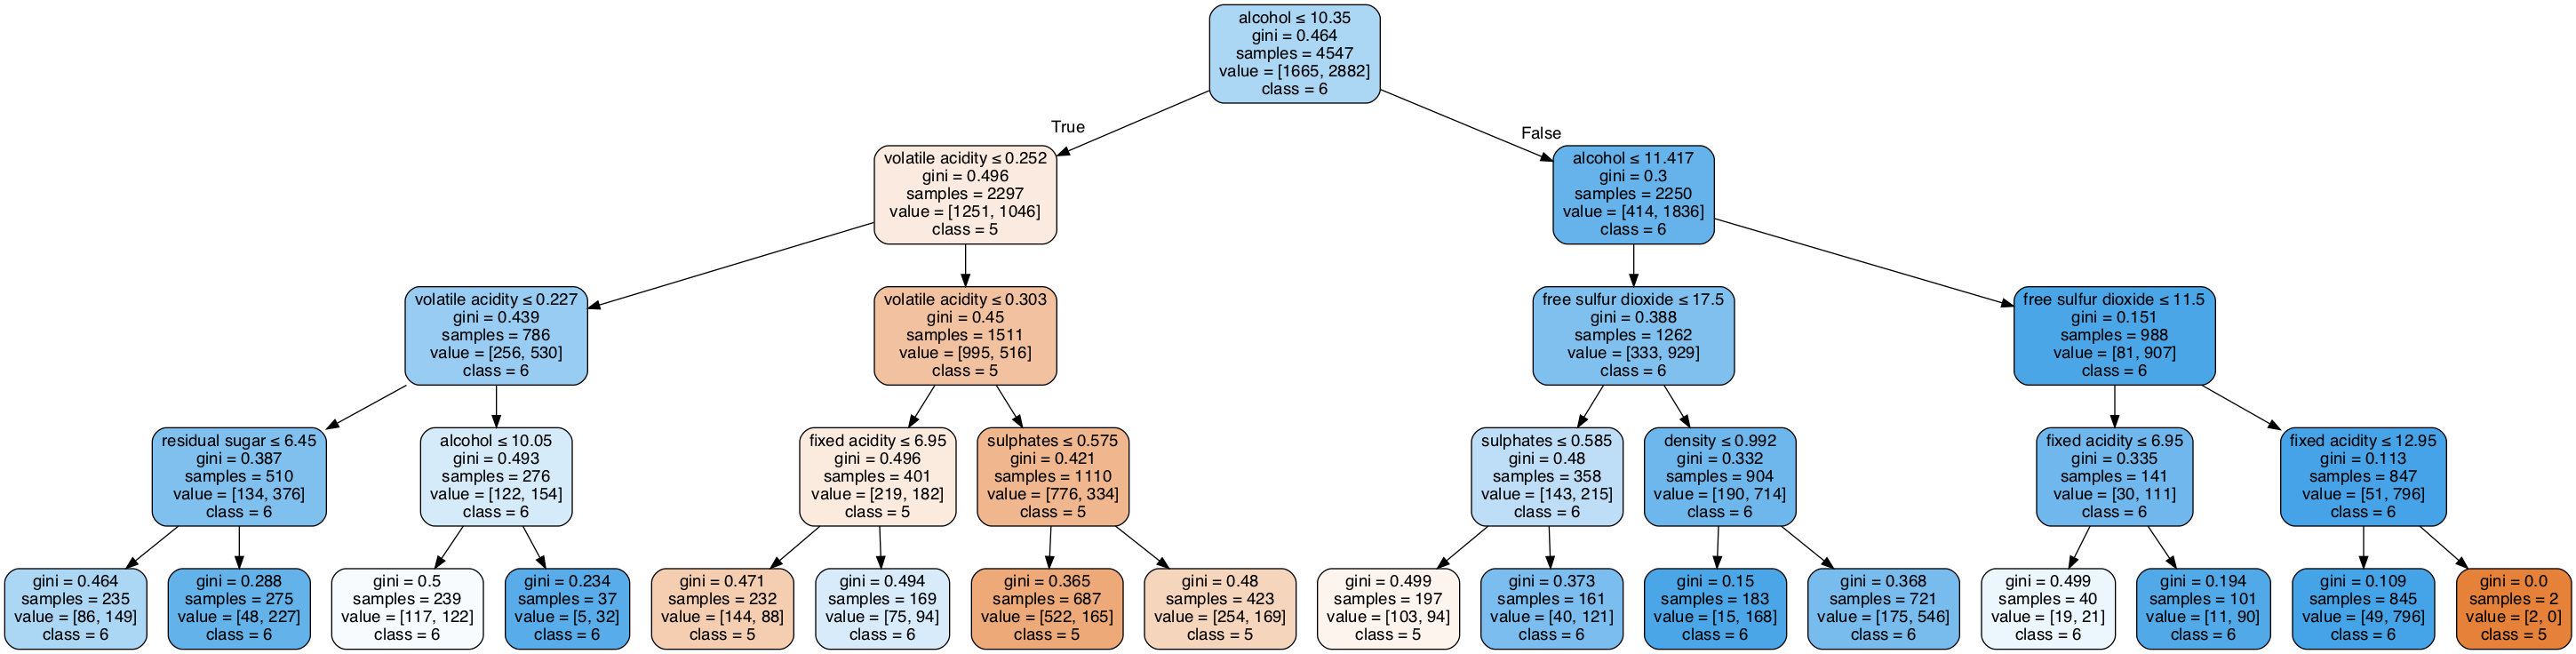

In [24]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['5', '6', '7', '4', '8', '3', '9'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('wineQuality.png')
Image(graph.create_png())

In [25]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy",max_depth=4, random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7471794871794872


In [26]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        0  
1      9.8        0  
2      9.8        0  
3      9.8        1  
4      9.4        0

In [27]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        1  
4         9.4        0  
...       ...      ...  
6492     11.2        1  
6493      9.6        0  
6494      9.4        1  
6495     12.8        1  
6496     11.8        1  

[6497 rows x 12 columns]

In [28]:
X = df.drop('quality', axis=1)
X = pd.get_dummies(X.astype(str))
y = df[['quality']]
print("X encoded has {} rows and {} features".format(*X.shape))
X.head()

X encoded has 6497 rows and 2651 features


fixed acidity_10.0  fixed acidity_10.1  fixed acidity_10.2  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   fixed acidity_10.3  fixed acidity_10.4  fixed acidity_10.5  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   fixed acidity_10.6  fixed acidity_10.7  fixed acidity_10.8  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   fixed acidity_10.9  ...  alcohol_9.55  alcohol_9.56666666666667  \
0                   0  ...             0                         0   
1                   0  ...             0                         0   
2                   0  ...             0                         0   
3                   0  ...             0                         0   
4                   0  ...             0                         0   

   alcohol_9.6  alcohol_9.63333333333333  alcohol_9.7  \
0            0                         0            0   
1            0                         0            0   
2            0                         0            0   
3            0                         0            0   
4            0                         0            0   

   alcohol_9.73333333333333  alcohol_9.75  alcohol_9.8  alcohol_9.9  \
0                         0             0            0            0   
1                         0             0            1            0   
2                         0             0            1            0   
3                         0             0            1            0   
4                         0             0            0            0   

   alcohol_9.95  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 2651 columns]

In [29]:
y

quality
0           0
1           0
2           0
3           1
4           0
...       ...
6492        1
6493        0
6494        1
6495        1
6496        1

[6497 rows x 1 columns]

In [30]:
print(X.shape,y.shape)

(6497, 2651) (6497, 1)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.3, random_state = 1769)

In [32]:
print("Shape of X_train\t:", X_train.shape)
print("Shape of X_test\t\t:", X_test.shape)
print("Shape of y_train\t:", y_train.shape)
print("Shape of y_test\t\t:", y_test.shape)

Shape of X_train	: (4547, 2651)
Shape of X_test		: (1950, 2651)
Shape of y_train	: (4547, 1)
Shape of y_test		: (1950, 1)


In [33]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.2)

In [34]:
from sklearn.tree import DecisionTreeClassifier
#tree = DecisionTreeClassifier()
tree = DecisionTreeClassifier(criterion="entropy",max_depth=10, random_state=0)

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(y_pred[1:5])

[1 1 0 1]


In [35]:
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}

In [36]:
print('min_samples_leaf\t:', tree.get_params()['min_samples_leaf'])
print('min_samples_split\t:', tree.get_params()['min_samples_split'])
print('max_depth\t\t:', tree.tree_.max_depth)
print('node_count\t\t:', tree.tree_.node_count)

min_samples_leaf	: 1
min_samples_split	: 2
max_depth		: 10
node_count		: 133


In [37]:
print('Self Score\t:', tree.score(X_train, y_train))
print("Accuracy\t:", metrics.accuracy_score(y_test, y_pred))
print("Precision\t:", metrics.precision_score(y_test, y_pred, average="weighted"))

Self Score	: 0.7382889817462063
Accuracy	: 0.7102564102564103
Precision	: 0.6992750774977673


In [38]:
#%aimport visuals
import visuals_2 as vs

              precision    recall  f1-score   support

           0       0.60      0.47      0.53       672
           1       0.75      0.83      0.79      1278

    accuracy                           0.71      1950
   macro avg       0.68      0.65      0.66      1950
weighted avg       0.70      0.71      0.70      1950



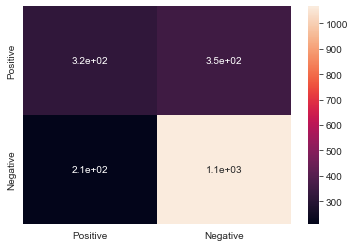

In [39]:
vs.render_confusion_matrix(y_test, y_pred)

In [40]:
vs.plot_learning_curve(naive_est, X_train, y_train, cv=cv, n_jobs=-1)
plt.show()

NameError: name 'naive_est' is not defined

[learning_curve] Training set sizes: [ 363 1182 2000 2818 3637]
[learning_curve] Training set sizes: [ 363 1182 2000 2818 3637]
[learning_curve] Training set sizes: [ 363 1182 2000 2818 3637]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s finished


[learning_curve] Training set sizes: [ 363 1182 2000 2818 3637]


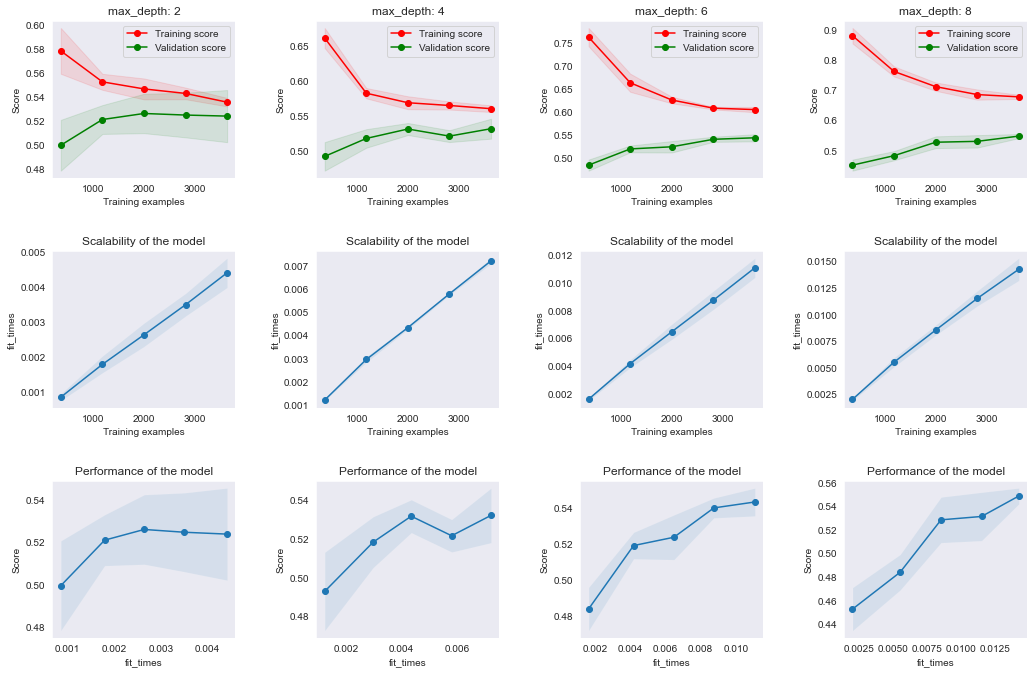

In [112]:
vs.plot_learning_curve_all(
    naive_est,
    X_train,
    y_train,
    param='max_depth',
    values=[2,4,6,8],
    cv=cv,
    n_jobs=-1,
    verbose=1
)

Fitting 5 folds for each of 4000 candidates, totalling 20000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1248 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 9248 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 13792 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 16492 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 19792 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 20000 out of 20000 | elapsed:   31.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


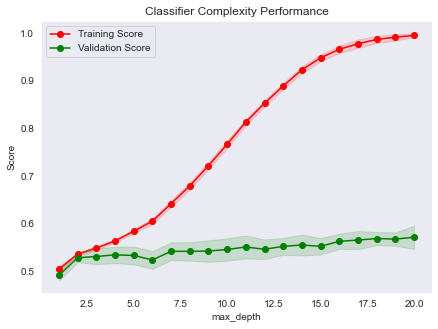

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


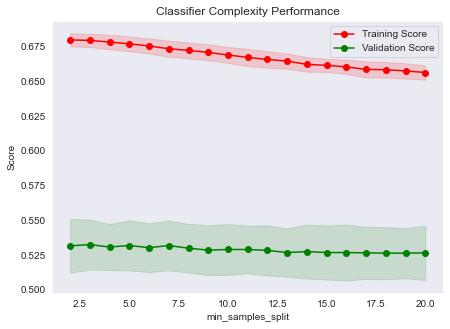

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


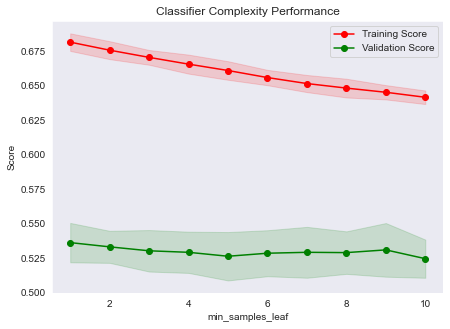

Best score from the Grid Search: 0.5716483516483516


In [113]:
param = {
    "max_depth": range(1,21),
    "min_samples_split": range(1,21),
    "min_samples_leaf": range(1,11)
}

grid = vs.grid_search_and_plot(
    estimator=naive_est,
    X=X_train, 
    y=y_train,
    param=param,
    cv=cv,
    verbose=1,
    n_jobs=-1,
    plot=True
)

In [114]:
grid.best_params_

{'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [115]:
gs_est = grid.best_estimator_
y_pred = gs_est.predict(X_test)

In [116]:
print('Self Score\t:', gs_est.score(X_train, y_train))
print("Accuracy\t:", metrics.accuracy_score(y_test, y_pred))
print("Precision\t:", metrics.precision_score(y_test, y_pred, average="weighted"))

Self Score	: 0.9894435891796789
Accuracy	: 0.5820512820512821
Precision	: 0.5814510586977171


/opt/anaconda3/envs/ai_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [117]:
print('min_samples_leaf\t:', gs_est.get_params()['min_samples_leaf'])
print('min_samples_split\t:', gs_est.get_params()['min_samples_split'])
print('max_depth\t\t:', gs_est.tree_.max_depth)
print('node_count\t\t:', gs_est.tree_.node_count)

min_samples_leaf	: 1
min_samples_split	: 2
max_depth		: 19
node_count		: 2369


In [118]:
vs.render_confusion_matrix(y_test, y_pred, ratio=False)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.22      0.23      0.22        62
           5       0.61      0.64      0.63       601
           6       0.64      0.61      0.63       868
           7       0.52      0.54      0.53       353
           8       0.25      0.29      0.27        52
           9       0.00      0.00      0.00         5

    accuracy                           0.58      1950
   macro avg       0.32      0.33      0.32      1950
weighted avg       0.58      0.58      0.58      1950



/opt/anaconda3/envs/ai_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: Shape of passed values is (7, 7), indices imply (2, 2)

<module 'matplotlib.pyplot' from '/opt/anaconda3/envs/ai_env/lib/python3.7/site-packages/matplotlib/pyplot.py'>

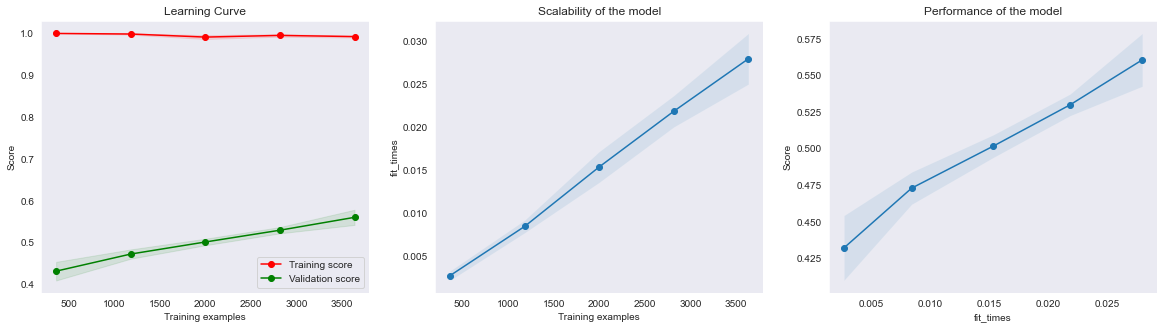

In [119]:
vs.plot_learning_curve(gs_est, X_train, y_train, cv=cv, n_jobs=-1)

In [121]:
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

def render_tree(filename, featureNames, classNames, estimator):
    dot_data = tree.export_graphviz(
        estimator,
        feature_names=featureNames,
        class_names=classNames,
        special_characters=True,
        filled=False,
        rounded=False
    )
    
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_png(filename)
    img = mpimg.imread(filename)
    plt.figure(figsize=(100,200))
    plt.imshow(img,interpolation = 'nearest')
    plt.show()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.395374 to fit



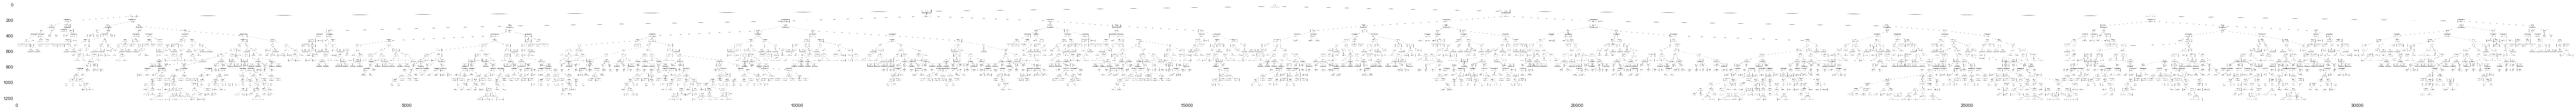

In [125]:
render_tree(
    filename='grid_searched_encoded_dt_final.png',
    featureNames=X.columns,
    classNames=['5', '6', '7', '4', '8', '3', '9'],
    estimator=gs_est
)

In [43]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        1  
4         9.4        0  
...       ...      ...  
6492     11.2        1  
6493      9.6        0  
6494      9.4        1  
6495     12.8        1  
6496     11.8        1  

[6497 rows x 12 columns]

In [44]:
X = df.drop('quality', axis=1)
X

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
6492     11.2  
6493      9.6  
6494      9.4  
6495     12.8  
6496     11.8  

[6497 rows x 11 columns]

In [49]:
#X = df.drop('quality', axis=1)
X = pd.get_dummies(X.astype(str))
y = df[['quality']]
print("X encoded has {} rows and {} features".format(*X.shape))
X.head()

X encoded has 6497 rows and 5302 features


fixed acidity_10.0_0  fixed acidity_10.0_1  fixed acidity_10.1_0  \
0                     1                     0                     1   
1                     1                     0                     1   
2                     1                     0                     1   
3                     1                     0                     1   
4                     1                     0                     1   

   fixed acidity_10.1_1  fixed acidity_10.2_0  fixed acidity_10.2_1  \
0                     0                     1                     0   
1                     0                     1                     0   
2                     0                     1                     0   
3                     0                     1                     0   
4                     0                     1                     0   

   fixed acidity_10.3_0  fixed acidity_10.3_1  fixed acidity_10.4_0  \
0                     1                     0                     1   
1                     1                     0                     1   
2                     1                     0                     1   
3                     1                     0                     1   
4                     1                     0                     1   

   fixed acidity_10.4_1  ...  alcohol_9.73333333333333_0  \
0                     0  ...                           1   
1                     0  ...                           1   
2                     0  ...                           1   
3                     0  ...                           1   
4                     0  ...                           1   

   alcohol_9.73333333333333_1  alcohol_9.75_0  alcohol_9.75_1  alcohol_9.8_0  \
0                           0               1               0              1   
1                           0               1               0              0   
2                           0               1               0              0   
3                           0               1               0              0   
4                           0               1               0              1   

   alcohol_9.8_1  alcohol_9.9_0  alcohol_9.9_1  alcohol_9.95_0  alcohol_9.95_1  
0              0              1              0               1               0  
1              1              1              0               1               0  
2              1              1              0               1               0  
3              1              1              0               1               0  
4              0              1              0               1               0  

[5 rows x 5302 columns]

In [50]:
y = df[['quality']]

In [51]:
y

quality
0           0
1           0
2           0
3           1
4           0
...       ...
6492        1
6493        0
6494        1
6495        1
6496        1

[6497 rows x 1 columns]

In [52]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [59]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [60]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7312820512820513


In [73]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = ((df[feature_name] - min_value) / (max_value - min_value))
    return result

In [105]:
#X = OrdinalEncoder(cols=[3]).fit_transform(X)

In [77]:
from sklearn import datasets
import numpy as np, pandas as pd
iris = datasets.load_iris()
X = iris.data  



In [97]:
###Case 1 - Target as 0,1,2
y = iris.target
###Case 2 - Target as 31,41,71
#y = pd.Series(iris.target).map({0:31,1:41,2:71})

y = df[['quality']]

In [98]:
y

quality
0           5
1           5
2           5
3           6
4           5
...       ...
6492        6
6493        5
6494        6
6495        7
6496        6

[6497 rows x 1 columns]

In [102]:
df[['quality']] = df['quality'].apply(lambda x : (x - x) if int(x) < 6 else ((x - x) + 1))

In [103]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        1  
4         9.4        0  
...       ...      ...  
6492     11.2        1  
6493      9.6        0  
6494      9.4        1  
6495     12.8        1  
6496     11.8        1  

[6497 rows x 12 columns]

In [104]:
df['quality'].unique()

array([0, 1])

### K-Nearest Neighbor

In [41]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        1  
4         9.4        0  
...       ...      ...  
6492     11.2        1  
6493      9.6        0  
6494      9.4        1  
6495     12.8        1  
6496     11.8        1  

[6497 rows x 12 columns]

In [43]:
#split dataset in features and target variable
feature_cols = ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
X = df[feature_cols] # Features
y = df.quality # Target variable

In [44]:
X

fixed acidity  volatile acidity  residual sugar  chlorides  \
0               7.4              0.70             1.9      0.076   
1               7.8              0.88             2.6      0.098   
2               7.8              0.76             2.3      0.092   
3              11.2              0.28             1.9      0.075   
4               7.4              0.70             1.9      0.076   
...             ...               ...             ...        ...   
6492            6.2              0.21             1.6      0.039   
6493            6.6              0.32             8.0      0.047   
6494            6.5              0.24             1.2      0.041   
6495            5.5              0.29             1.1      0.022   
6496            6.0              0.21             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
6492     11.2  
6493      9.6  
6494      9.4  
6495     12.8  
6496     11.8  

[6497 rows x 10 columns]

In [45]:
y

0       0
1       0
2       0
3       1
4       0
       ..
6492    1
6493    0
6494    1
6495    1
6496    1
Name: quality, Length: 6497, dtype: int64

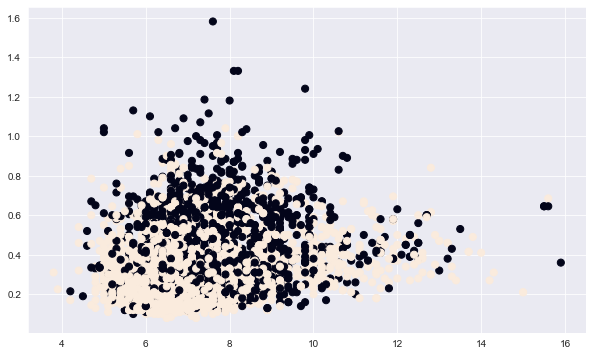

In [51]:
#scatter plot of dataset
plt.figure(figsize = (10,6))
plt.scatter(X['fixed acidity'],X['volatile acidity'], c=y, marker= 'o', s=50)
plt.show()

In [52]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [53]:
knn5 = KNeighborsClassifier() #k=5
knn1 = KNeighborsClassifier(n_neighbors=1) #k=1

In [54]:
knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [58]:
y_pred_5 = knn5.predict(X_test)
y_pred_1 = knn1.predict(X_test)

In [67]:
knn5.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [69]:
print('Self Score\t:', knn5.score(X_train, y_train))
print("Accuracy\t:", metrics.accuracy_score(y_test, y_pred_5))
print("Precision\t:", metrics.precision_score(y_test, y_pred_5, average="weighted"))

Self Score	: 0.7820541016054542
Accuracy	: 0.6861538461538461
Precision	: 0.6787796980841767


In [70]:
print('Self Score\t:', knn1.score(X_train, y_train))
print("Accuracy\t:", metrics.accuracy_score(y_test, y_pred_1))
print("Precision\t:", metrics.precision_score(y_test, y_pred_1, average="weighted"))

Self Score	: 1.0
Accuracy	: 0.7302564102564103
Precision	: 0.7308943113767878


              precision    recall  f1-score   support

           0       0.59      0.51      0.54       719
           1       0.73      0.79      0.76      1231

    accuracy                           0.69      1950
   macro avg       0.66      0.65      0.65      1950
weighted avg       0.68      0.69      0.68      1950



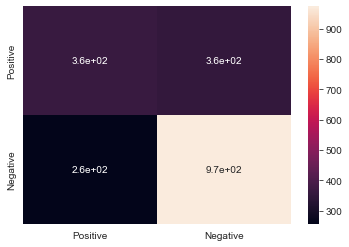

In [72]:
vs.render_confusion_matrix(y_test, y_pred_5)

              precision    recall  f1-score   support

           0       0.63      0.64      0.64       719
           1       0.79      0.78      0.79      1231

    accuracy                           0.73      1950
   macro avg       0.71      0.71      0.71      1950
weighted avg       0.73      0.73      0.73      1950



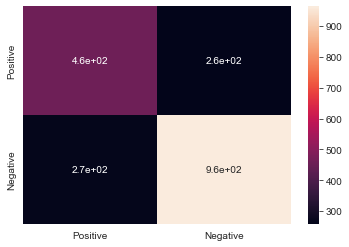

In [71]:
vs.render_confusion_matrix(y_test, y_pred_1)

In [75]:
cv = ShuffleSplit(n_splits=5, test_size=0.2)

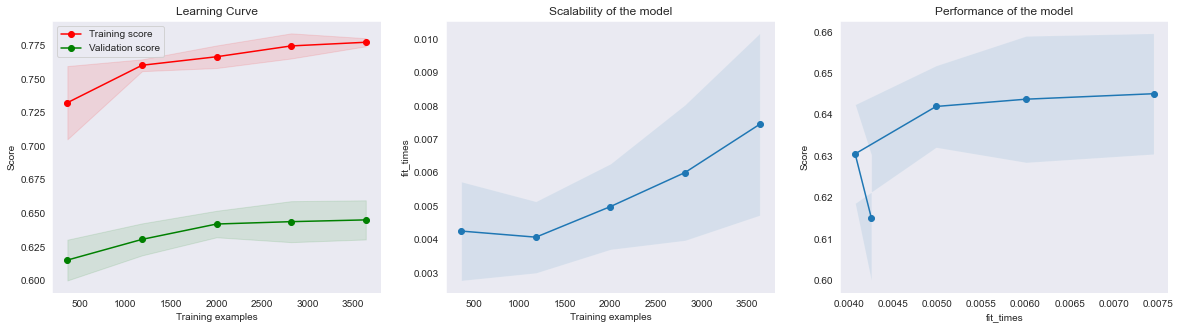

In [76]:
vs.plot_learning_curve(knn5, X_train, y_train, cv=cv, n_jobs=-1)
plt.show()

[learning_curve] Training set sizes: [ 363 1182 2000 2818 3637]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[learning_curve] Training set sizes: [ 363 1182 2000 2818 3637]


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[learning_curve] Training set sizes: [ 363 1182 2000 2818 3637]


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[learning_curve] Training set sizes: [ 363 1182 2000 2818 3637]


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.3s finished


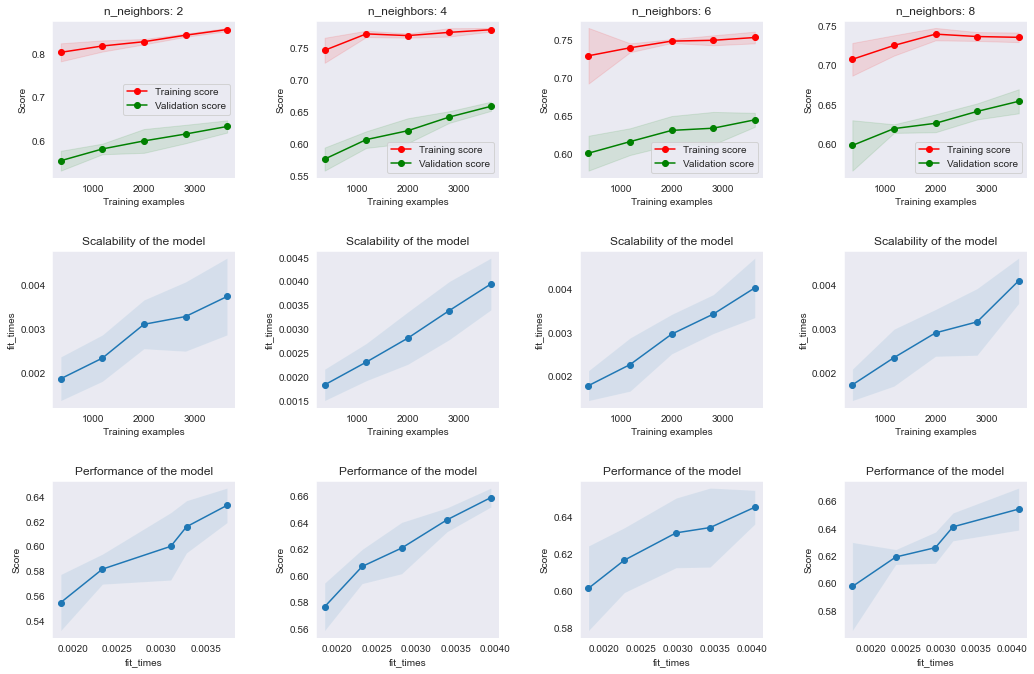

In [78]:
vs.plot_learning_curve_all(
    knn5,
    X_train,
    y_train,
    param='n_neighbors',
    values=[2,4,6,8],
    cv=cv,
    n_jobs=-1,
    verbose=1
)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.4s finished


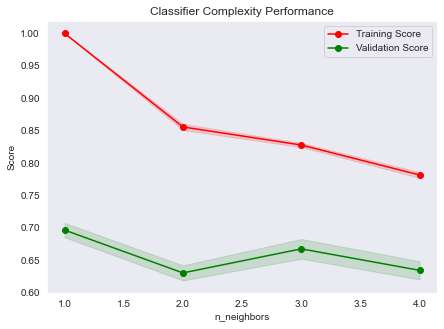

Best score from the Grid Search: 0.7006593406593407


In [80]:
param = {
    "n_neighbors": range(1,5)
}

grid = vs.grid_search_and_plot(
    estimator=knn5,
    X=X_train, 
    y=y_train,
    param=param,
    cv=cv,
    verbose=1,
    n_jobs=-1,
    plot=True
)

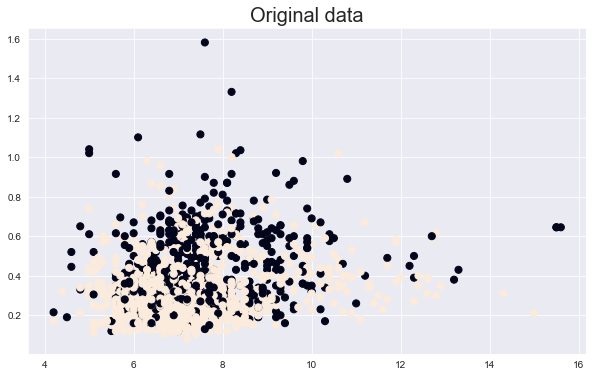

In [62]:
plt.figure(figsize = (10,6))
plt.scatter(X_test['fixed acidity'],X_test['volatile acidity'], c=y_test, marker= 'o', s=50)
plt.title("Original data", fontsize=20)
plt.show()

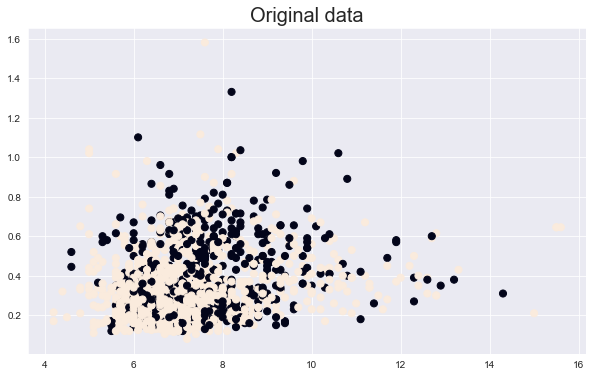

In [63]:
plt.figure(figsize = (10,6))
plt.scatter(X_test['fixed acidity'],X_test['volatile acidity'], c=y_pred_5, marker= 'o', s=50)
plt.title("Original data", fontsize=20)
plt.show()

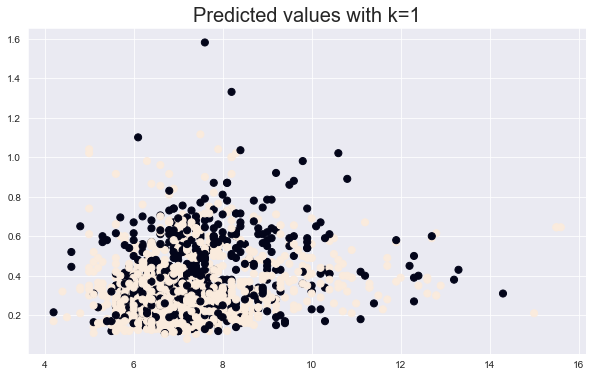

In [65]:

plt.figure(figsize = (10,6))
plt.scatter(X_test['fixed acidity'],X_test['volatile acidity'], c=y_pred_1, marker= 'o', s=50)
plt.title("Predicted values with k=1", fontsize=20)
plt.show()

In [82]:
knn_grid = GridSearchCV(estimator = KNeighborsClassifier(), 
                        param_grid={'n_neighbors': np.arange(1,20)}, cv=5)

In [83]:
knn_grid.fit(X, y)


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [84]:
knn_grid.best_params_

{'n_neighbors': 7}